In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [6]:
# Reading data and Dispalying the data frame
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Finding size of dataframe
data.shape

(150, 6)

In [8]:
# Removing unnecessary columns
data.drop('Id', axis=1, inplace=True)

In [9]:
# Rename the columns for easier identification
data.rename(columns={'SepalLengthCm': 'SepalLength', 'SepalWidthCm': 'SepalWidth', 'PetalLengthCm': 'PetalLength', 'PetalWidthCm':'PetalWidth'},inplace=True)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Checking for null values
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [12]:
# Total count of each attribute
data.count()

SepalLength    150
SepalWidth     150
PetalLength    150
PetalWidth     150
Species        150
dtype: int64

In [13]:
# Printing summary statistics
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


we can see that the SepalLenght has the highest average length than the PetalLenght. The SepalWidth also has highest average
width than the PetalWidth.

Also the SepalLenght and the SepalWidth has the highest Minimum and maximum length that the Petallenght and the PetalWidth.  

In [14]:
# Checking for dupilcate
data.duplicated().sum()

3

# Data Visualization

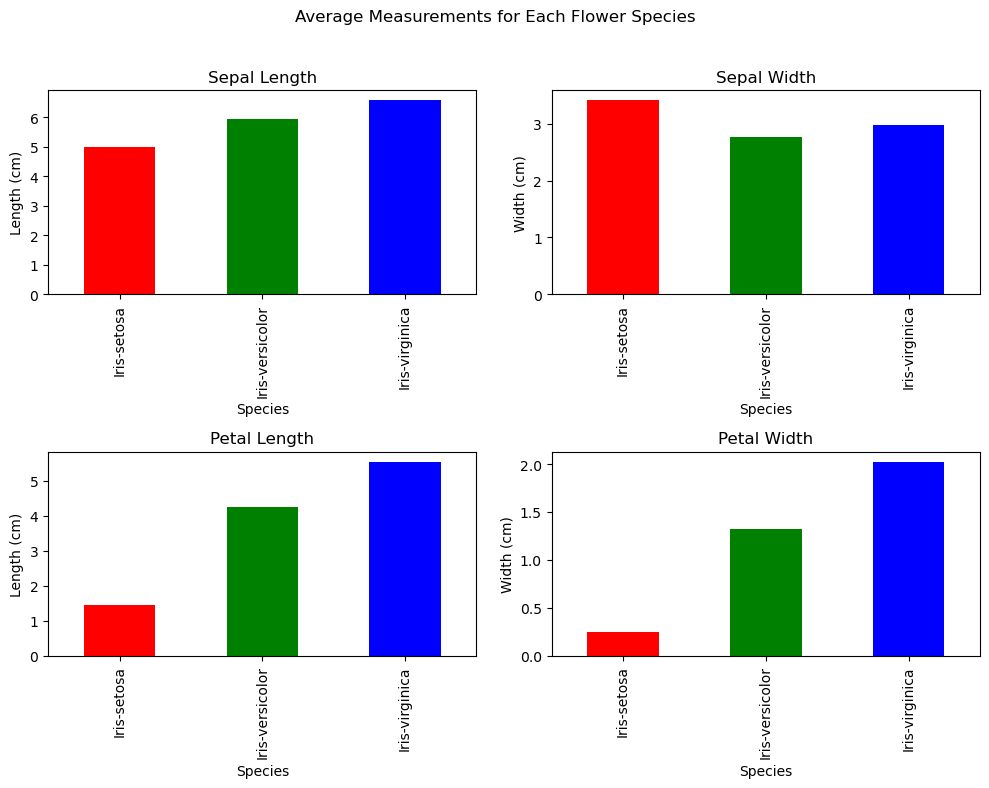

In [15]:

# Calculate the average measurements for each species
average_measurements = data.groupby('Species').mean()

# Plot the bar charts
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Average Measurements for Each Flower Species')

# Sepal Length
average_measurements['SepalLength'].plot(kind='bar', ax=axes[0, 0], color=['red', 'green', 'blue'], legend=False)
axes[0, 0].set_title('Sepal Length')
axes[0, 0].set_ylabel('Length (cm)')

# Sepal Width
average_measurements['SepalWidth'].plot(kind='bar', ax=axes[0, 1], color=['red', 'green', 'blue'], legend=False)
axes[0, 1].set_title('Sepal Width')
axes[0, 1].set_ylabel('Width (cm)')

# Petal Length
average_measurements['PetalLength'].plot(kind='bar', ax=axes[1, 0], color=['red', 'green', 'blue'], legend=False)
axes[1, 0].set_title('Petal Length')
axes[1, 0].set_ylabel('Length (cm)')

# Petal Width
average_measurements['PetalWidth'].plot(kind='bar', ax=axes[1, 1], color=['red', 'green', 'blue'], legend=False)
axes[1, 1].set_title('Petal Width')
axes[1, 1].set_ylabel('Width (cm)')

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


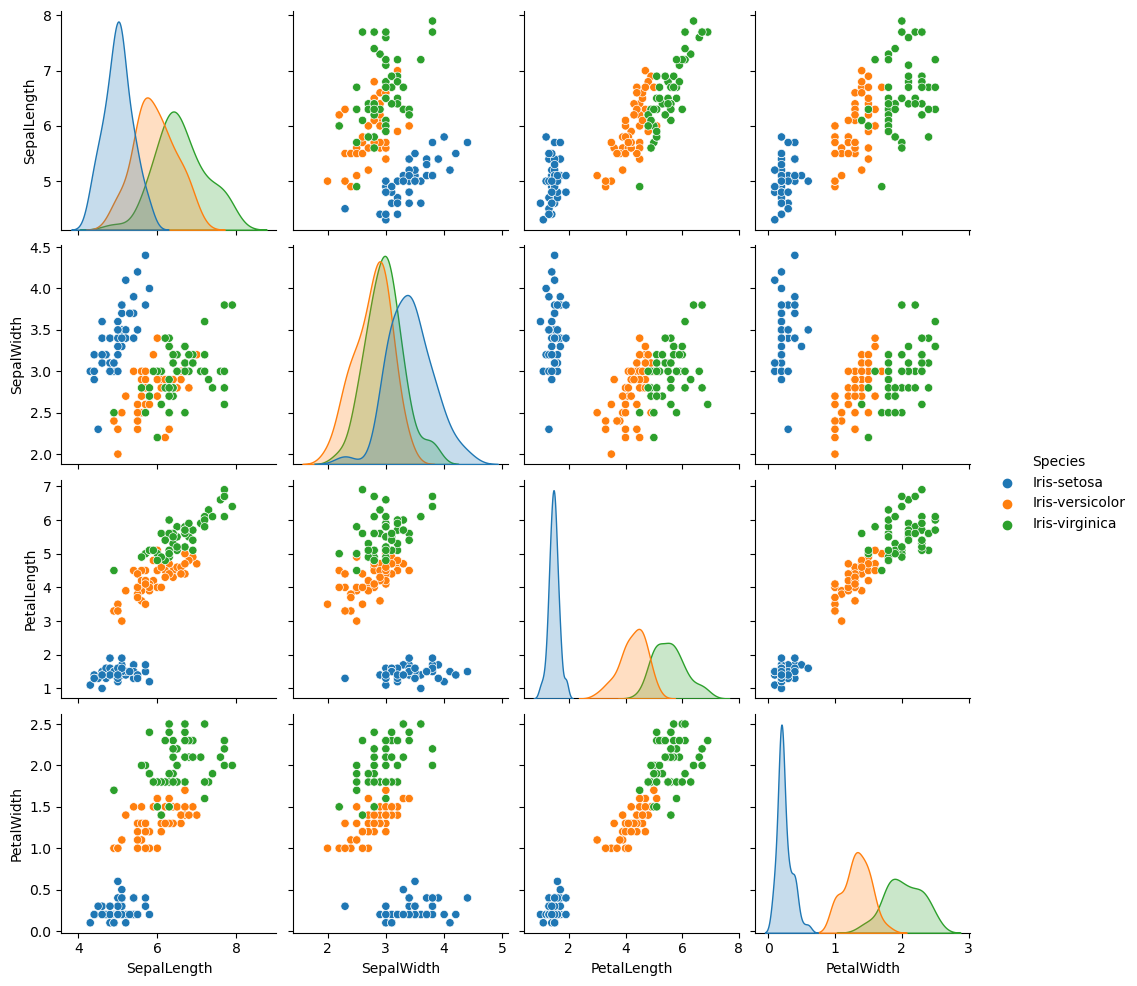

C:\Users\DELL\AppData\Local\Temp\ipykernel_2864\978421933.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


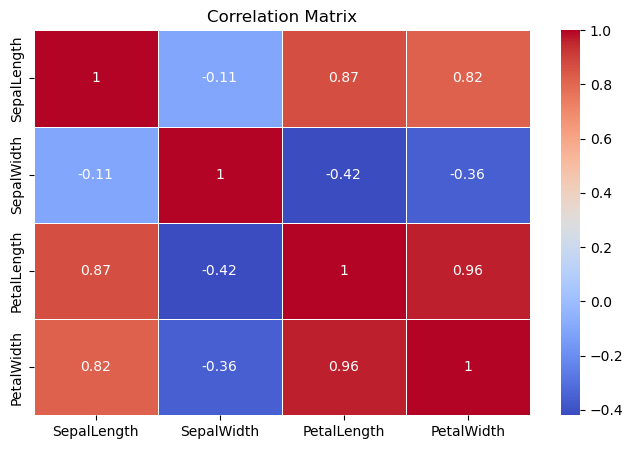

In [16]:
# 1. Pairplot
sns.pairplot(data, hue='Species')
plt.show()

# 2. Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Importing label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Species']= label_encoder.fit_transform(data['Species']) 
  
data['Species'].unique()


array([0, 1, 2])

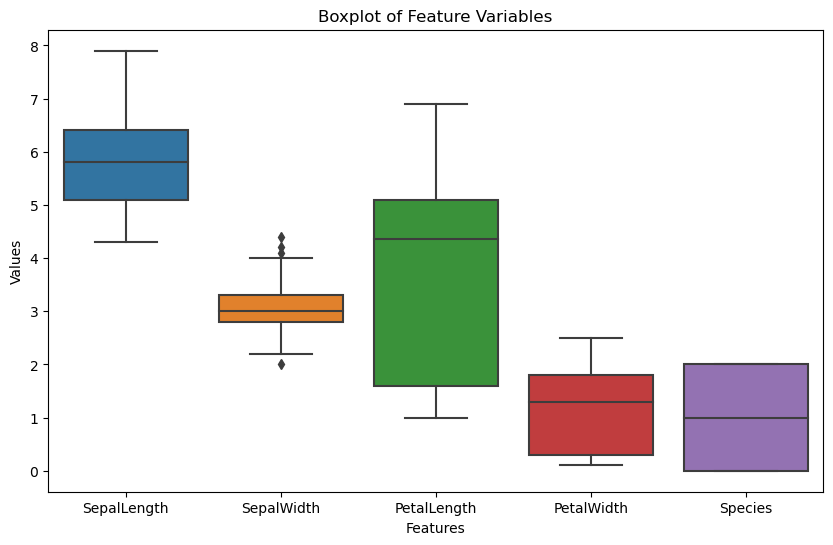

In [18]:
# Plotting boxplots for each feature variable in X to check outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.title('Boxplot of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Values')
#plt.xticks(rotation=45)
plt.show()

In [19]:
# Define a function to remove outliers based on z-score
df=data
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from X
data_no_outliers = remove_outliers_zscore(data)
data_no_outliers

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


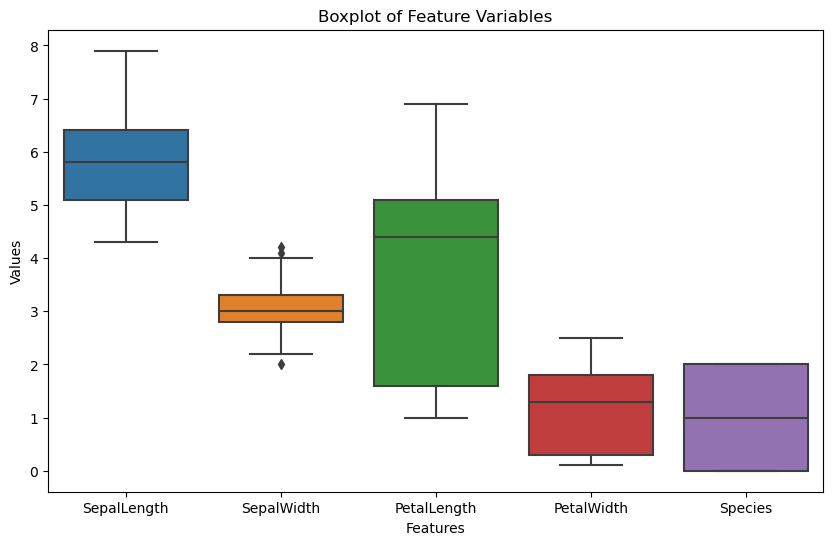

In [20]:
# Plotting boxplots for each feature variable in X to check outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data_no_outliers)
plt.title('Boxplot of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Values')
#plt.xticks(rotation=45)
plt.show()

In [21]:
# Splitting data into testing and training
X = data_no_outliers.drop('Species', axis=1)
y = data_no_outliers['Species']

In [22]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(111, 4)
(38, 4)


# DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [26]:
print("Train Score : ", model.score(X_train,y_train))
print("Test Score : ", model.score(X_test,y_test))

Train Score :  1.0
Test Score :  0.868421052631579


In [27]:
# Predictions
#train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [28]:
y_pred=model.predict(X_test)

In [29]:
print(accuracy_score(y_test,y_pred))

0.868421052631579


[[14  0  0]
 [ 0 13  1]
 [ 0  4  6]]


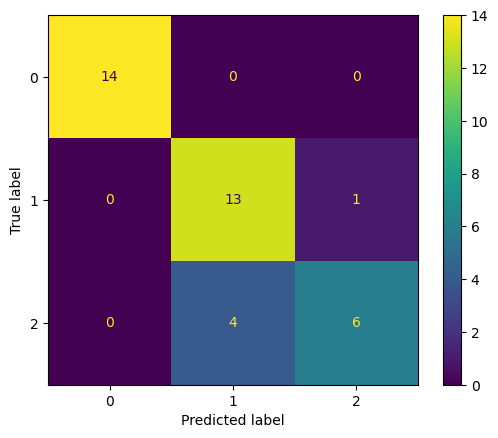

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.76      0.93      0.84        14
           2       0.86      0.60      0.71        10

    accuracy                           0.87        38
   macro avg       0.87      0.84      0.85        38
weighted avg       0.88      0.87      0.86        38



# RandomForestClassifier

In [32]:
Rf=RandomForestClassifier(n_estimators=82)
Rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=82)

In [33]:
Rf.score(X_train,y_train)

1.0

In [34]:
y_pred=Rf.predict(X_test)

In [35]:
print(accuracy_score(y_test,y_pred))

0.868421052631579


[[14  0  0]
 [ 0 13  1]
 [ 0  4  6]]


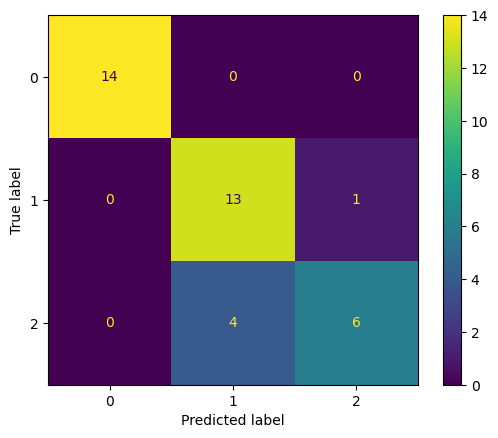

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.76      0.93      0.84        14
           2       0.86      0.60      0.71        10

    accuracy                           0.87        38
   macro avg       0.87      0.84      0.85        38
weighted avg       0.88      0.87      0.86        38



In [43]:
LR= LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [44]:
LR.score(X_train,y_train)

0.9819819819819819

In [45]:
y_pred=LR.predict(X_test)

In [46]:
print(accuracy_score(y_test,y_pred))

0.8947368421052632


[[14  0  0]
 [ 0 13  1]
 [ 0  3  7]]


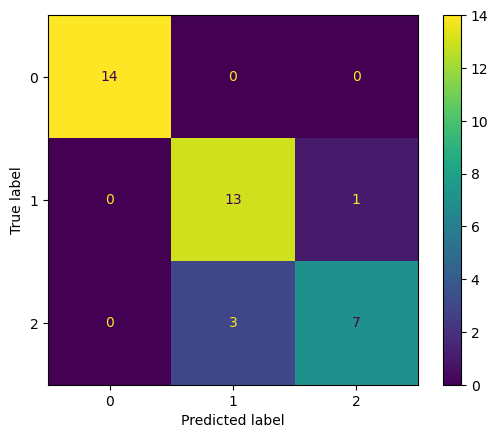

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.81      0.93      0.87        14
           2       0.88      0.70      0.78        10

    accuracy                           0.89        38
   macro avg       0.90      0.88      0.88        38
weighted avg       0.90      0.89      0.89        38



# Summary/Conclusion

# Below is a summary of the logical conclusion based on the visuals and model evaluation above:

Data Visualization

Scatter Plots: The scatter plots for various pairs of features (such as sepal length vs. sepal width, petal length vs. petal
width) show clear clustering, which suggests that the features are effective at differentiating between the three Iris species
(Setosa, Versicolor, and Virginica).

Histograms: The histograms of each feature (sepal length, sepal width, petal length, petal width) indicate that the petal 
measurements are more effective in distinguishing between species compared to sepal measurements. For example, Setosa has 
distinctively smaller petal lengths compared to the other two species.

Model Training and Evaluation:

Model Selection: Decision Tree, Logistic model and Random Forest models were used to classify the Iris species based on the features.
    
Confusion Matrix: The confusion matrix shows the number of correct and incorrect classifications for each species:
Setosa (class 0) was perfectly classified with no misclassifications.

Versicolor (class 1) had one misclassification as Virginica.

Virginica (class 2) had four instances misclassified as Versicolor, which suggests some overlap in feature space 
between these two species.

Classification Report: The report provides the precision, recall, and F1-score for each class:
Setosa (class 0) achieved perfect scores across all metrics.

Versicolor (class 1) had high recall (0.93) but slightly lower precision 
(0.76), indicating that the model is better at identifying Versicolor when it is present but sometimes incorrectly labels other 
species as Versicolor.

Virginica (class 2) had moderate precision (0.86) and lower recall (0.60), indicating that the model 
struggles more with correctly identifying Virginica.

Overall Accuracy: The model(Decision Tree and Random Forest) achieved an accuracy of 0.87,  indicating that 
it correctly classified 87% of the test samples. while Logistic model achieved accuracy of 0.89 indicating that 
it correctly classified 89% of the test samples

Conclusion: The models performs well overall, with the strongest performance in 
classifying Setosa. There is some overlap in the feature space between Versicolor and Virginica, leading to occasional 
misclassifications between these two species. The visualizations clearly support the model's findings, particularly in showing 
how petal measurements are more distinctive across species.